# Open Raw data to start cleaning and preprocessing.

previously we created a jupyter notebook containing all the preprocessing and the cleaning. I created a new notebook that lets me preprocess the data and understand why we selected the features for the model. 

I also wanted to explain fully where this process comes from and the steps that took to understand it properly. 


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
# We identify the shape of the data matrix and assing those values to the tupple feature and sample. 
n_samples, n_features = df.shape
print("number of samples: ",n_samples)
print("number of features: ", n_features)

number of samples:  6991
number of features:  41


Created a in64 column with the numerical values of the target column.
* FALSE POSITIVE: 0 
* CONFIRMED:      1
* CANDIDATE:      2

In [4]:

df["int_koi_disposition"]= df['koi_disposition']
# created a dictionary to replace the strings for integer
cleanup_disposition = {'int_koi_disposition':{'FALSE POSITIVE': int(0) , 'CONFIRMED': int(1), 'CANDIDATE':int(2) }}
df.replace(cleanup_disposition, inplace= True)


In [5]:
df['koi_disposition'].value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

In [6]:
df['int_koi_disposition'].value_counts()

0    3504
1    1800
2    1687
Name: int_koi_disposition, dtype: int64

In [7]:
df_names = df.copy()
df_names = df_names['koi_disposition']
df = df.drop(['koi_disposition'],axis = 1)
df_names

0            CONFIRMED
1       FALSE POSITIVE
2       FALSE POSITIVE
3            CONFIRMED
4            CONFIRMED
             ...      
6986    FALSE POSITIVE
6987    FALSE POSITIVE
6988         CANDIDATE
6989    FALSE POSITIVE
6990    FALSE POSITIVE
Name: koi_disposition, Length: 6991, dtype: object

In [8]:
# pd.plotting.scatter_matrix(df, c=df['int_koi_disposition'], figsize=(20,20))

# Balancing the dataset


In [9]:
# we are going balance the dataset to have the same number of categries as they have in the value_counts()
num_of_targets = 1687

indices_to_remove = []
for row in df:
    print(row)
    

koi_fpflag_nt
koi_fpflag_ss
koi_fpflag_co
koi_fpflag_ec
koi_period
koi_period_err1
koi_period_err2
koi_time0bk
koi_time0bk_err1
koi_time0bk_err2
koi_impact
koi_impact_err1
koi_impact_err2
koi_duration
koi_duration_err1
koi_duration_err2
koi_depth
koi_depth_err1
koi_depth_err2
koi_prad
koi_prad_err1
koi_prad_err2
koi_teq
koi_insol
koi_insol_err1
koi_insol_err2
koi_model_snr
koi_tce_plnt_num
koi_steff
koi_steff_err1
koi_steff_err2
koi_slogg
koi_slogg_err1
koi_slogg_err2
koi_srad
koi_srad_err1
koi_srad_err2
ra
dec
koi_kepmag
int_koi_disposition


We used the iblearn to balance the dataset, it will divide the data in equal numbers and then save it as X_res, y_res

In [10]:
from imblearn.under_sampling import NearMiss
X = df.iloc[:,:40]
y = df.iloc[:,40]
nm = NearMiss()
X_res, y_res = nm.fit_sample(X,y)

Using TensorFlow backend.


In [11]:
X_res

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,1,1,0,11.413214,0.000134,-0.000134,140.119880,0.008260,-0.008260,...,-203,4.330,0.128,-0.192,1.155,0.363,-0.195,296.27393,44.010441,13.746
1,0,1,1,0,7.126847,0.000056,-0.000056,137.428070,0.006730,-0.006730,...,-182,4.525,0.044,-0.176,0.896,0.231,-0.082,285.98483,43.090912,14.800
2,1,0,0,0,11.928319,0.000320,-0.000320,142.127000,0.023000,-0.023000,...,-151,4.545,0.071,-0.052,0.750,0.071,-0.079,290.64545,44.904202,15.577
3,0,0,1,0,13.655096,0.000151,-0.000151,137.526510,0.007420,-0.007420,...,-198,4.487,0.054,-0.216,0.962,0.315,-0.105,296.61996,48.905800,14.818
4,0,1,1,1,25.955404,0.000591,-0.000591,148.798900,0.021400,-0.021400,...,-180,4.408,0.087,-0.203,1.038,0.323,-0.139,293.72696,39.036800,14.145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5056,0,0,0,0,4.736816,0.000147,-0.000147,131.787600,0.025600,-0.025600,...,-201,4.456,0.056,-0.224,1.011,0.329,-0.110,289.20331,44.505138,13.922
5057,0,0,0,0,130.235324,0.003030,-0.003030,218.271900,0.020100,-0.020100,...,-183,4.529,0.036,-0.192,0.903,0.251,-0.084,289.57452,44.519939,15.991
5058,0,0,0,0,8.870416,0.000009,-0.000009,137.481093,0.000869,-0.000869,...,-181,4.027,0.434,-0.186,1.514,0.426,-0.640,290.14914,50.239178,13.579
5059,0,0,0,0,47.109631,0.000194,-0.000194,144.131720,0.003430,-0.003430,...,-159,3.597,0.968,-0.242,2.780,1.089,-2.022,296.15601,44.920090,13.731


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:

pearsoncorr = df.corr(method='pearson')
pearsoncorr

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,int_koi_disposition
koi_fpflag_nt,1.000000,-0.241148,0.003062,0.050790,0.408724,0.353231,-0.353231,0.249381,0.250697,-0.250697,...,-0.128576,0.053214,-0.140248,0.045535,0.098100,-0.062283,0.030920,-0.046510,-0.101643,-0.380710
koi_fpflag_ss,-0.241148,1.000000,0.144516,0.101695,-0.155964,-0.134208,0.134208,-0.111469,-0.177043,0.177043,...,-0.053394,0.118900,-0.061800,0.032638,0.030783,-0.034283,0.088010,-0.053471,-0.006009,-0.486481
koi_fpflag_co,0.003062,0.144516,1.000000,0.538280,-0.164792,-0.084351,0.084351,-0.121452,-0.023107,0.023107,...,-0.012101,-0.019921,-0.057406,0.032129,0.029239,-0.016611,0.159988,-0.094027,0.067023,-0.452002
koi_fpflag_ec,0.050790,0.101695,0.538280,1.000000,-0.138946,-0.079903,0.079903,-0.099760,0.013635,-0.013635,...,0.003066,-0.006111,-0.052307,0.022411,0.030085,-0.011970,0.069693,-0.045495,0.047932,-0.339983
koi_period,0.408724,-0.155964,-0.164792,-0.138946,1.000000,0.674842,-0.674842,0.655186,0.272529,-0.272529,...,-0.055410,-0.006147,-0.168086,0.017590,0.041289,-0.008776,-0.030675,0.011226,-0.045959,-0.023592
koi_period_err1,0.353231,-0.134208,-0.084351,-0.079903,0.674842,1.000000,-1.000000,0.469613,0.472034,-0.472034,...,-0.014447,0.005737,-0.140277,0.015100,0.033152,-0.008890,-0.005353,0.007145,-0.034097,-0.047197
koi_period_err2,-0.353231,0.134208,0.084351,0.079903,-0.674842,-1.000000,1.000000,-0.469613,-0.472034,0.472034,...,0.014447,-0.005737,0.140277,-0.015100,-0.033152,0.008890,0.005353,-0.007145,0.034097,0.047197
koi_time0bk,0.249381,-0.111469,-0.121452,-0.099760,0.655186,0.469613,-0.469613,1.000000,0.162845,-0.162845,...,-0.001929,-0.031890,-0.107467,-0.004831,0.006444,0.011434,-0.016981,0.010483,0.021898,0.009463
koi_time0bk_err1,0.250697,-0.177043,-0.023107,0.013635,0.272529,0.472034,-0.472034,0.162845,1.000000,-1.000000,...,-0.046285,0.035131,-0.116730,0.047142,0.068065,-0.042652,-0.003804,-0.009188,-0.041119,0.029161
koi_time0bk_err2,-0.250697,0.177043,0.023107,-0.013635,-0.272529,-0.472034,0.472034,-0.162845,-1.000000,1.000000,...,0.046285,-0.035131,0.116730,-0.047142,-0.068065,0.042652,0.003804,0.009188,0.041119,-0.029161


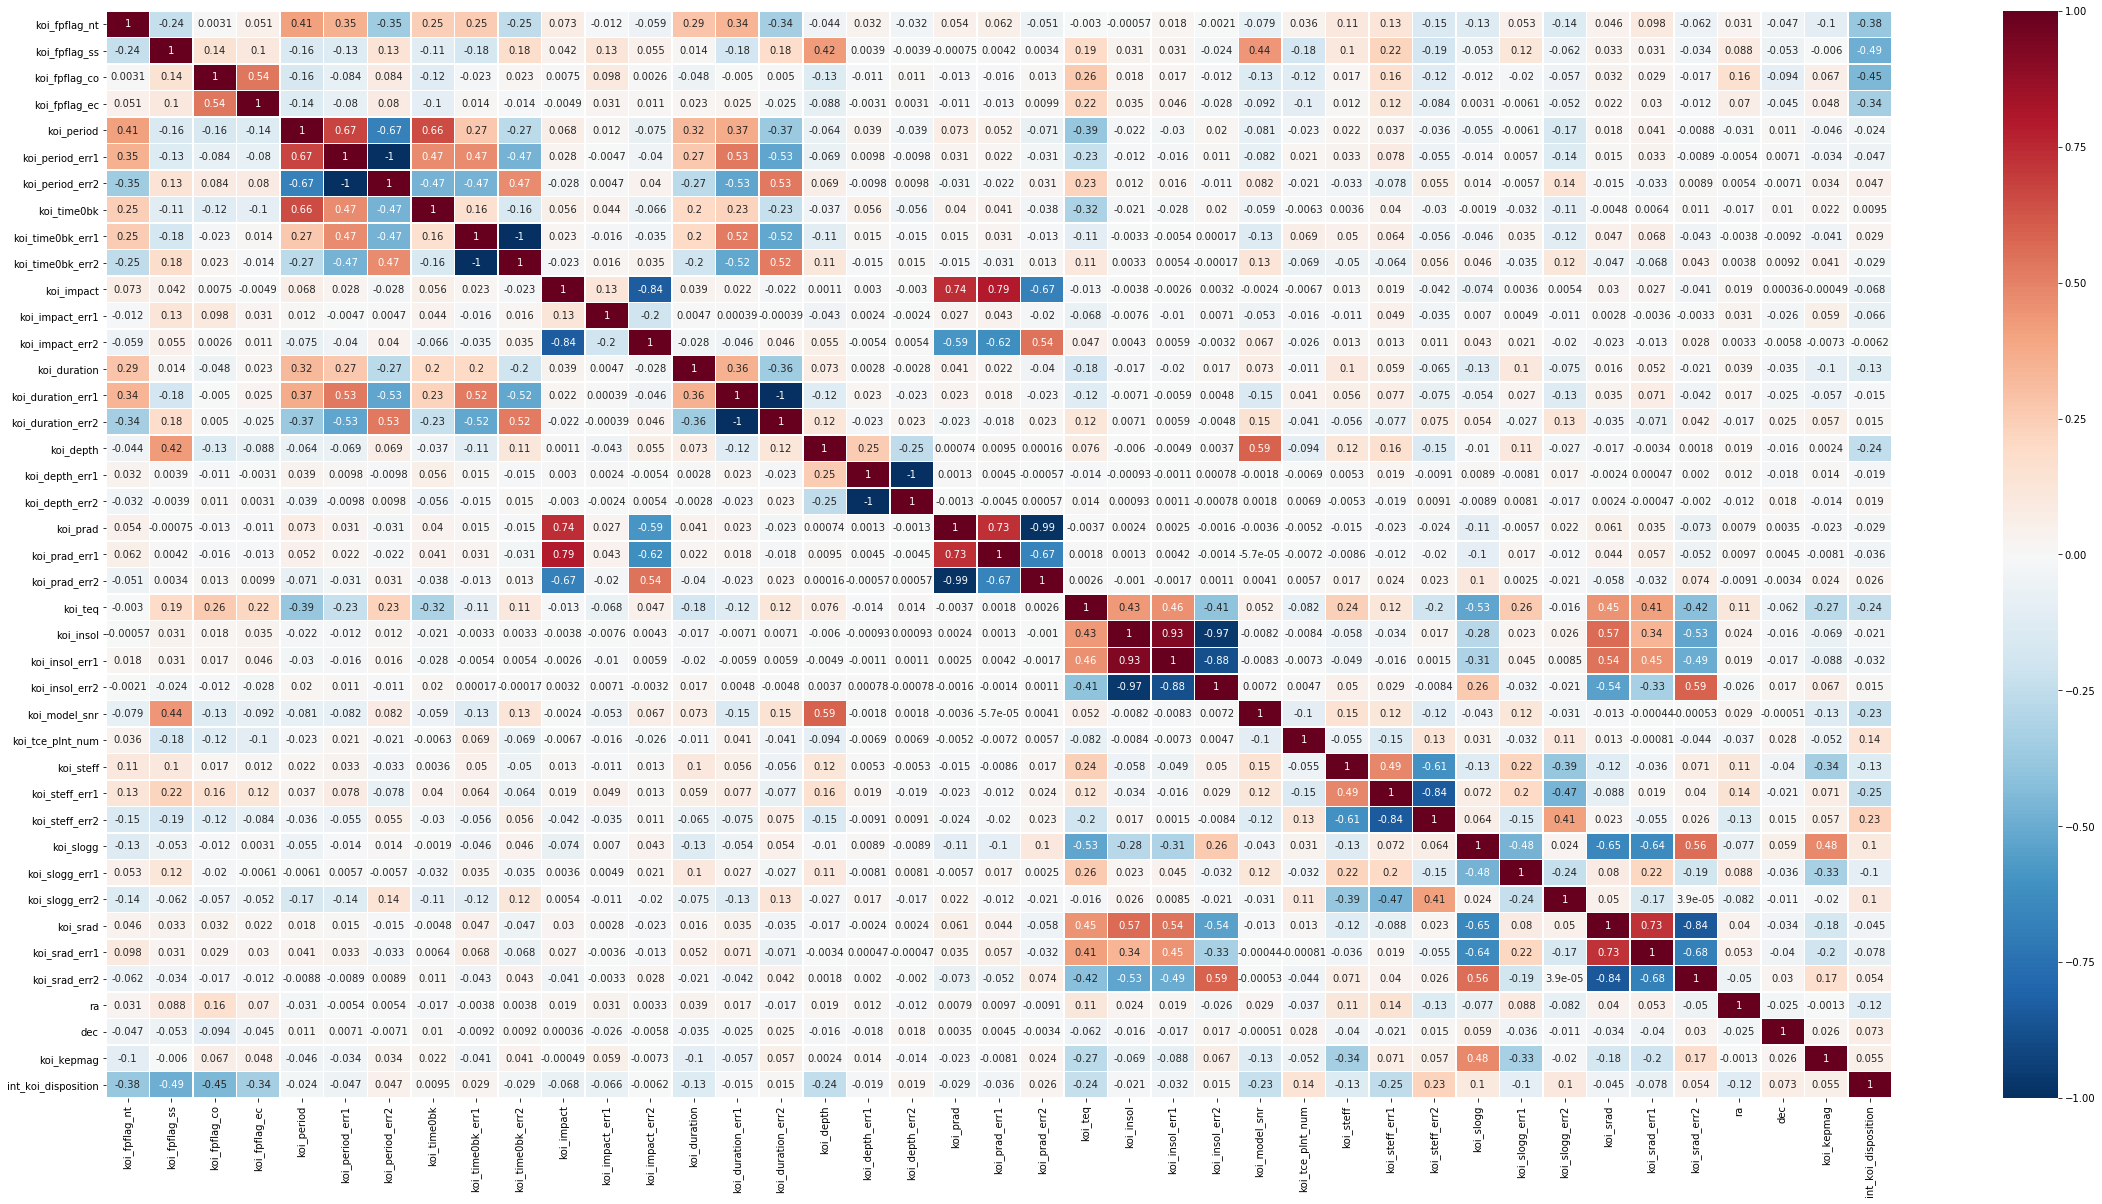

In [14]:
correlation_plot , ax =plt.subplots(figsize=(40,20))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [15]:
correlation_plot.savefig('Correlation_matrix.png')

In [16]:
df.columns

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg',
       'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1',
       'koi_srad_err2', 'ra', 'dec', 'koi_kepmag', 'int_koi_disposition'],
      dtype='object')

We are going to create a new dataframe ready for the feature selection. We are removing those values that are higly correlated to each other, mostly the error values 

In [25]:
filtered_df = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_impact', 'koi_impact_err1', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_steff_err1', 'koi_slogg',
       'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'ra', 'dec', 'koi_kepmag', 'int_koi_disposition']]
num_rows, num_feats = filtered_df.shape
num_feats -= 1
filtered_df

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_impact,koi_impact_err1,koi_duration,koi_duration_err1,koi_duration_err2,...,koi_steff,koi_steff_err1,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,ra,dec,koi_kepmag,int_koi_disposition
0,0,0,0,0,54.418383,0.586,0.059,4.50700,0.11600,-0.11600,...,5455,81,4.467,0.064,-0.096,0.927,291.93423,48.141651,15.347,1
1,0,1,0,0,19.899140,0.969,5.126,1.78220,0.03410,-0.03410,...,5853,158,4.544,0.044,-0.176,0.868,297.00482,48.134129,15.436,0
2,0,1,0,0,1.736952,1.276,0.115,2.40641,0.00537,-0.00537,...,5805,157,4.564,0.053,-0.168,0.791,285.53461,48.285210,15.597,0
3,0,0,0,0,2.525592,0.701,0.235,1.65450,0.04200,-0.04200,...,6031,169,4.438,0.070,-0.210,1.046,288.75488,48.226200,15.509,1
4,0,0,0,0,4.134435,0.762,0.139,3.14020,0.06730,-0.06730,...,6046,189,4.486,0.054,-0.229,0.972,296.28613,48.224670,15.714,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0,0,0,1,8.589871,0.765,0.023,4.80600,0.63400,-0.63400,...,5638,169,4.296,0.231,-0.189,1.088,298.74921,46.973351,14.478,0
6987,0,1,1,0,0.527699,1.252,0.051,3.22210,0.01740,-0.01740,...,5638,139,4.529,0.035,-0.196,0.903,297.18875,47.093819,14.082,0
6988,0,0,0,0,1.739849,0.043,0.423,3.11400,0.22900,-0.22900,...,6119,165,4.444,0.056,-0.224,1.031,286.50937,47.163219,14.757,2
6989,0,0,1,0,0.681402,0.147,0.309,0.86500,0.16200,-0.16200,...,6173,193,4.447,0.056,-0.224,1.041,294.16489,47.176281,15.385,0


## Feature Selection
* Used different analysis to identify the best features that we can utilize for the models


In [19]:
from sklearn.feature_selection import f_regression
X = filtered_df.iloc[:,:26]
y = filtered_df.iloc[:,26:]
feature_selection_f_regression = f_regression(X,y)


C:\Users\luico\Anaconda3\envs\pytensor2-0\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
results_df = pd.DataFrame({'Features':X.columns, 
                           'f_statistic':feature_selection_f_regression[0], 
                           'p-values': feature_selection_f_regression[1].round(3), 
                           'Valid': np.where(feature_selection_f_regression[1]< 0.05, 'yes','no') })
results_df.sort_values(by=['p-values'])

,Features,f_statistic,p-values,Valid
0,koi_fpflag_nt,1184.697109,0.000,yes
23,ra,98.518401,0.000,yes
22,koi_srad,14.289282,0.000,yes
21,koi_slogg_err2,77.137155,0.000,yes
20,koi_slogg_err1,70.590458,0.000,yes
19,koi_slogg,72.291238,0.000,yes
18,koi_steff_err1,482.338445,0.000,yes
17,koi_steff,126.554258,0.000,yes
16,koi_tce_plnt_num,131.133961,0.000,yes
15,koi_model_snr,404.274130,0.000,yes


---------------------------
In a similar manner we are going to very our results with another method. using the univariate feature selection that utilizes Chi squared 

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

26 selected features


In [34]:
fit = chi_selector.fit(X_norm,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(26,'Score'))  #print 26best features

                Specs        Score
1       koi_fpflag_ss  1535.445517
2       koi_fpflag_co  1388.322952
0       koi_fpflag_nt  1026.385296
3       koi_fpflag_ec   865.776133
15      koi_model_snr   119.079950
10          koi_depth    94.980634
16   koi_tce_plnt_num    82.695277
6     koi_impact_err1    48.674569
4          koi_period    35.822505
13            koi_teq    25.723340
18     koi_steff_err1    24.422514
23                 ra    17.185060
20     koi_slogg_err1    16.632232
8   koi_duration_err1    15.318027
7        koi_duration    10.375722
24                dec     9.619966
5          koi_impact     6.751096
22           koi_srad     4.648342
17          koi_steff     4.103589
21     koi_slogg_err2     3.380790
14          koi_insol     2.335548
19          koi_slogg     1.519681
11     koi_depth_err1     1.391766
25         koi_kepmag     0.491398
9   koi_duration_err2     0.247128
12     koi_depth_err2     0.000469


---
##### Also we are going to use the Recursive Feature Elimination (RFE)

In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
rfe_selector = RFE(estimator=estimator, n_features_to_select=num_feats, step=1, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

C:\Users\luico\Anaconda3\envs\pytensor2-0\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


26 selected features


In [53]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
for onekernel in kernel:
    
    estimator = SVR(kernel=onekernel)
    rfe_selector = RFE(estimator=estimator, n_features_to_select=num_feats, step=1, verbose=5)
    fit_rfe = rfe_selector.fit(X_norm, y)
    dfscores_rfe = pd.DataFrame(fit_rfe.ranking_)
    dfcolumns_rfe = pd.DataFrame(X.columns)
    #concat two dataframes for better visualization 
    featureScores_rfe = pd.concat([dfcolumns_rfe,dfscores_rfe],axis=1)
    featureScores_rfe.columns = ['Specs','Score']  #naming the dataframe columns
    print(featureScores_rfe.nlargest(26,'Score'))  #print 26 best features

C:\Users\luico\Anaconda3\envs\pytensor2-0\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                Specs  Score
0       koi_fpflag_nt      1
1       koi_fpflag_ss      1
24                dec      1
23                 ra      1
22           koi_srad      1
21     koi_slogg_err2      1
20     koi_slogg_err1      1
19          koi_slogg      1
18     koi_steff_err1      1
17          koi_steff      1
16   koi_tce_plnt_num      1
15      koi_model_snr      1
14          koi_insol      1
13            koi_teq      1
12     koi_depth_err2      1
11     koi_depth_err1      1
10          koi_depth      1
9   koi_duration_err2      1
8   koi_duration_err1      1
7        koi_duration      1
6     koi_impact_err1      1
5          koi_impact      1
4          koi_period      1
3       koi_fpflag_ec      1
2       koi_fpflag_co      1
25         koi_kepmag      1


C:\Users\luico\Anaconda3\envs\pytensor2-0\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                Specs  Score
0       koi_fpflag_nt      1
1       koi_fpflag_ss      1
24                dec      1
23                 ra      1
22           koi_srad      1
21     koi_slogg_err2      1
20     koi_slogg_err1      1
19          koi_slogg      1
18     koi_steff_err1      1
17          koi_steff      1
16   koi_tce_plnt_num      1
15      koi_model_snr      1
14          koi_insol      1
13            koi_teq      1
12     koi_depth_err2      1
11     koi_depth_err1      1
10          koi_depth      1
9   koi_duration_err2      1
8   koi_duration_err1      1
7        koi_duration      1
6     koi_impact_err1      1
5          koi_impact      1
4          koi_period      1
3       koi_fpflag_ec      1
2       koi_fpflag_co      1
25         koi_kepmag      1


C:\Users\luico\Anaconda3\envs\pytensor2-0\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                Specs  Score
0       koi_fpflag_nt      1
1       koi_fpflag_ss      1
24                dec      1
23                 ra      1
22           koi_srad      1
21     koi_slogg_err2      1
20     koi_slogg_err1      1
19          koi_slogg      1
18     koi_steff_err1      1
17          koi_steff      1
16   koi_tce_plnt_num      1
15      koi_model_snr      1
14          koi_insol      1
13            koi_teq      1
12     koi_depth_err2      1
11     koi_depth_err1      1
10          koi_depth      1
9   koi_duration_err2      1
8   koi_duration_err1      1
7        koi_duration      1
6     koi_impact_err1      1
5          koi_impact      1
4          koi_period      1
3       koi_fpflag_ec      1
2       koi_fpflag_co      1
25         koi_kepmag      1


C:\Users\luico\Anaconda3\envs\pytensor2-0\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                Specs  Score
0       koi_fpflag_nt      1
1       koi_fpflag_ss      1
24                dec      1
23                 ra      1
22           koi_srad      1
21     koi_slogg_err2      1
20     koi_slogg_err1      1
19          koi_slogg      1
18     koi_steff_err1      1
17          koi_steff      1
16   koi_tce_plnt_num      1
15      koi_model_snr      1
14          koi_insol      1
13            koi_teq      1
12     koi_depth_err2      1
11     koi_depth_err1      1
10          koi_depth      1
9   koi_duration_err2      1
8   koi_duration_err1      1
7        koi_duration      1
6     koi_impact_err1      1
5          koi_impact      1
4          koi_period      1
3       koi_fpflag_ec      1
2       koi_fpflag_co      1
25         koi_kepmag      1


In [54]:
fit_rfe.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [55]:
rfe_support

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [59]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications

rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X_norm,y)
rfecv.grid_scores_
rfecv_df = pd.DataFrame({'Features': X.columns, 'RFECV': rfecv.grid_scores_ })
rfecv_df

C:\Users\luico\Anaconda3\envs\pytensor2-0\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Features,RFECV
0,koi_fpflag_nt,0.596910
1,koi_fpflag_ss,0.600200
2,koi_fpflag_co,0.610929
3,koi_fpflag_ec,0.615792
4,koi_period,0.623945
5,koi_impact,0.626091
6,koi_impact_err1,0.625090
7,koi_duration,0.670577
8,koi_duration_err1,0.774709
9,koi_duration_err2,0.811760


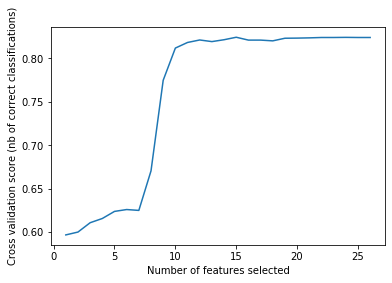

In [58]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()